### Keras Reseach NB

In [167]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split

from tensorflow.keras.regularizers import *



Generate a function we will attempt to approximate with increasing frequencies (non linearities)

- Very well could be due to the sampling of our function -> Perhaps we include another feature 

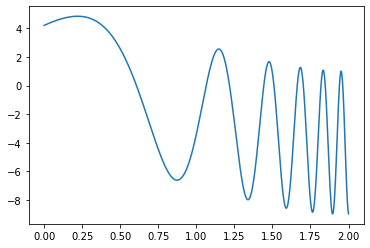

In [222]:
x=np.linspace(0,2,1000)

def func(x):
    return x**3-3*x**2+np.sin(6**x)*5

plt.plot(x,func(x))

In [223]:
X_train,X_test,y_train,y_test=train_test_split(x,func(x),train_size=0.75)

X_train=X_train.reshape(len(X_train),1)
X_test=X_test.reshape(len(X_test),1)
#y_train=y_train.reshape(len(y_train),1)
#y_test=y_test.reshape(len(y_test),1)


In [224]:
print("Shape for X_Train is", X_train.shape)
print("Shape for X_Test is", X_test.shape)

Shape for X_Train is (750, 1)
Shape for X_Test is (250, 1)


Build General Structure of the Model

In [225]:
model = tf.keras.models.Sequential()
# build the model in sequential terms 

model.add(tf.keras.Input(shape=1))
# add the input which is the domain of our function

model.add(tf.keras.layers.Dense(32, activation='relu'))
# add a hidden layers of Relu activation
          
model.add(tf.keras.layers.Dense(32,activation='relu'))
# add a hidden layers of Relu activation

model.add(tf.keras.layers.Dense(1,activation='linear'))
# # add a linear layer to sum across all of our values 




Set the Optimizer, loss and evaluation metrics 

In [226]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

Train our model across 1000 epochs -> 1000 permutations of data when solving optimizer 

In [227]:
history = model.fit(X_train, y_train, epochs=1000,batch_size=64,verbose=0)

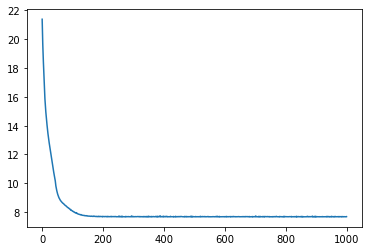

In [228]:
plt.plot(history.history['loss'])

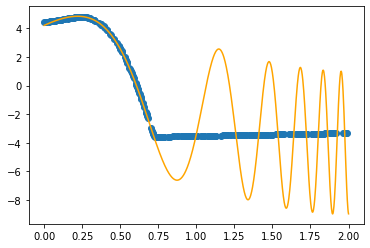

In [229]:
plt.scatter(X_test,model.predict(X_test),label='NN')
plotted_x=np.sort(X_test.reshape(1,-1)[0])
plt.plot(x,func(x),color='orange')

In [230]:
print (model.evaluate(X_test,y_test))

250/250 [==============================] - 0s 613us/sample - loss: 7.0185 - mean_squared_error: 7.0185
[7.018514823913574, 7.0185146]


Note the weakness of the NN prediction when the frequency increases. What improvements can we make 

- Regularization weights for our weight vectors -> L2 Regularization ( Did not effect Outcome)
- Changed L2 Loss function to Huber Loss -> Which applies linear & qudratic loss ( Weak effect)
- Increased Layers -> ( Did Improve  accuracy)
- Intialized weights by sampling from random distribution and intialized biases to zero (slighlty improved accuracy)


In [264]:
model2 = tf.keras.models.Sequential()
# build the model in sequential terms 


model2.add(tf.keras.Input(shape=1))
# add the input which is the domain of our function

regularizer = tf.keras.regularizers.l2(0.05)

model2.add(tf.keras.layers.Dense(32, kernel_initializer='random_normal',
    bias_initializer='zeros',activation='relu', kernel_regularizer='l2'))
# add a hidden layers of Relu activation

model2.add(tf.keras.layers.Dense(32,kernel_initializer='random_normal',
    bias_initializer='zeros',activation='tanh', kernel_regularizer='l2'))
# add a hidden layers of Relu activation
          
model2.add(tf.keras.layers.Dense(32,kernel_initializer='random_normal',
    bias_initializer='zeros',activation='relu', kernel_regularizer='l2'))
# add a hidden layers of Relu activation

model2.add(tf.keras.layers.Dense(32,kernel_initializer='random_normal',
    bias_initializer='zeros',activation='tanh', kernel_regularizer='l2'))
# add a hidden layers of Relu activation


model2.add(tf.keras.layers.Dense(1,kernel_initializer='random_normal',
    bias_initializer='zeros',activation='linear' ,kernel_regularizer='l2'))
# # add a linear layer to sum across all of our values 




In [265]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.Huber(delta=1.5, reduction="auto", name="huber_loss"),
              metrics=[tf.keras.metrics.MeanSquaredError()])

In [266]:
history = model2.fit(X_train, y_train, epochs=1000,batch_size=64,verbose=0)

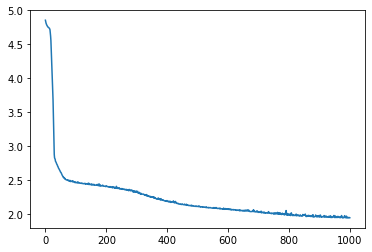

In [267]:
plt.plot(history.history['loss'])

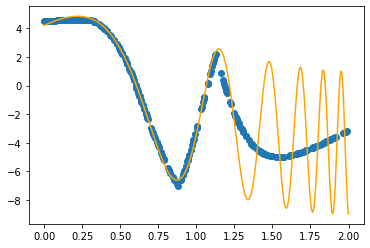

In [268]:
plt.scatter(X_test,model2.predict(X_test),label='NN')
plotted_x=np.sort(X_test.reshape(1,-1)[0])
plt.plot(x,func(x),color='orange')

In [269]:
print (model2.evaluate(X_test,y_test))

250/250 [==============================] - 0s 880us/sample - loss: 1.8936 - mean_squared_error: 5.0487
[1.8935866088867188, 5.0486555]
